In [1]:
# first importing necessary libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset directly from raw file from github

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Exploratory Data Analysis (EDA)

In [3]:
# checking no. of column and rows of dataset by .shape method

df.shape

(158, 12)

There are 158 rows and 12 column in our dataset.

In [4]:
#checking the basic information of data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

column named Country and Region having object data type.
Happiness Rank have int datatype.
our target variable Happiness Score having float data dtye. so we can use Regression analysis for this data set.
given data set usage approx. 15 kb memory.

In [3]:
#I think Happiness rank, Country and Region will not play the major role to predit the target 'Happiness Score' so we are deleting this column.

df=df.drop(['Country','Region','Happiness Rank'],axis=1)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
# Checking the Stats of this DataSet.

df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Now all the columns have float data types values. So we can apply regreesion analysis on this dataset. Stats are looking normal.

In [5]:
# Checking null values of this dataset.

df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There is no any Null Value in our dataset. 

In [6]:
# checking data skewness of this dataset.
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Looking some positive side skewness in Standard error, Trust ans Generosity. we will deal with them.

In [8]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


after checking correlation of this dataset, we can see Standard error is negatively correlate with our target variable.
all the other features having positive correlation with our label.
we will also cross check the same with heatmap method.

<function matplotlib.pyplot.show(close=None, block=None)>

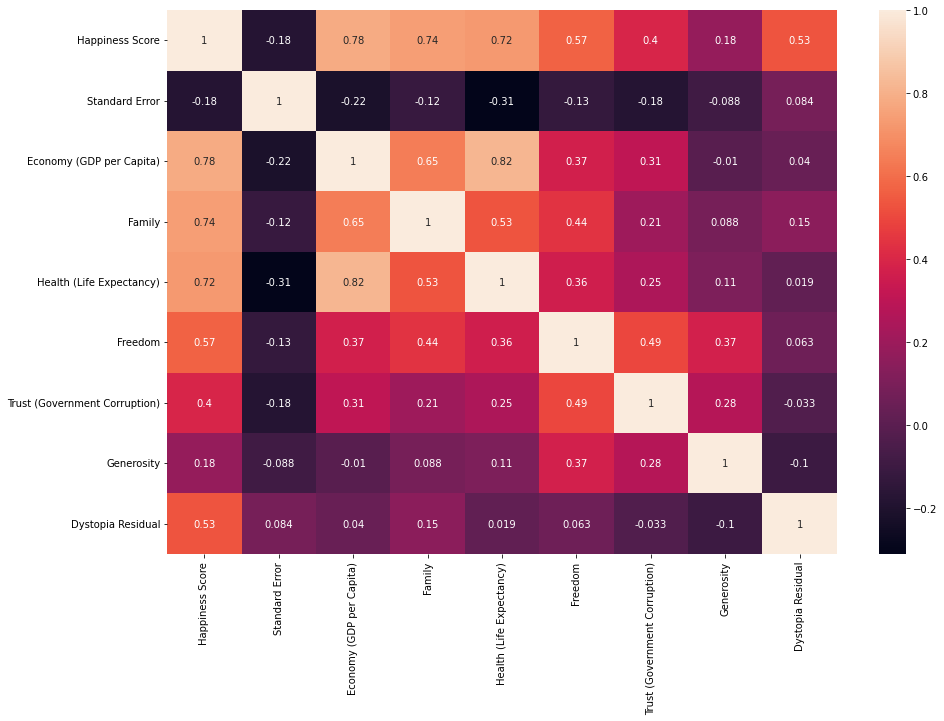

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show

it is also shown with above heat map that our target variable ia negatively correlate with Standard error.


Happiness Score                     AxesSubplot(0.125,0.657941;0.227941x0.222059)
Standard Error                   AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Freedom                          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.227941x0.222059)
Generosity                          AxesSubplot(0.398529,0.125;0.227941x0.222059)
Dystopia Residual                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

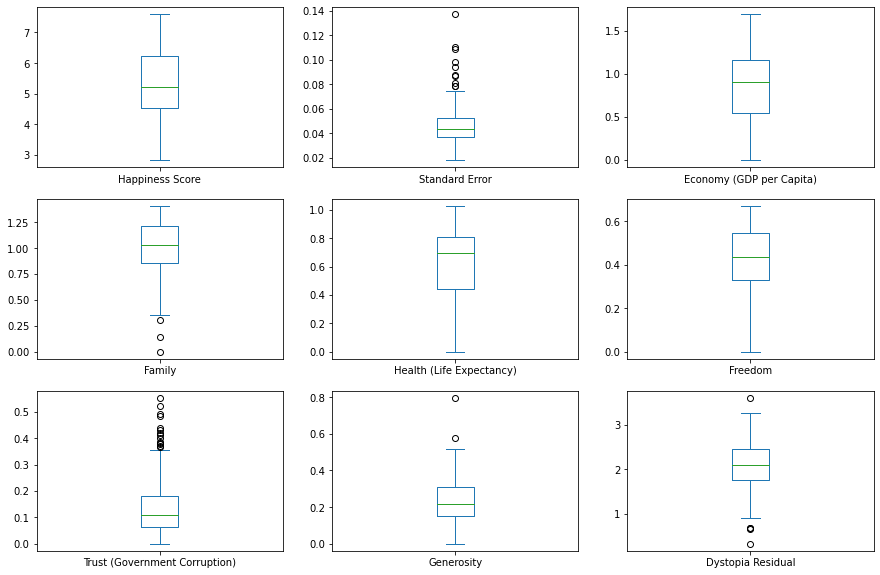

In [11]:
# Now will check the outliers in dataset with box plot.

df.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))

This is clearly shown with above visualization there is outliers present in Standard error and Trust (Government Corruption)

In [14]:
# Now we will standardize the dataset with zscore technique.

from scipy.stats import zscore

In [15]:
z=np.abs(zscore(df))
threashold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [16]:
z

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [21]:
df=df[(z<3).all(axis=1)]
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
# Data Standardization with Standard Scaler and transform the data

from sklearn.preprocessing import StandardScaler

In [24]:
Scaler=StandardScaler()

In [25]:
# Fit the data on Standard Scaler

Scaler.fit_transform(df)

array([[ 1.94794451, -0.86678606,  1.38191593, ...,  2.47225453,
         0.54630526,  0.7568764 ],
       [ 1.92446866,  0.18566863,  1.13832385, ...,  0.00924715,
         1.71389767,  1.10929978],
       [ 1.89376946, -0.92608935,  1.19821973, ...,  3.03674718,
         0.91963022,  0.70850719],
       ...,
       [-1.67456049, -1.10042671, -1.40259581, ..., -0.38241996,
         1.11805063, -0.32213507],
       [-1.8867461 , -0.69173419, -1.48837933, ..., -0.53365337,
        -0.40922585, -0.9307015 ],
       [-2.27951521,  2.88218185, -2.19013866, ..., -0.35206708,
        -0.28645792, -0.54943602]])

In [26]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [31]:
# Checking Data loss
Data_Loss=(158-149)/158*100
Data_Loss

5.69620253164557

Our Data Loss in 5.69%

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [32]:
x= df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

# Creating the training and testing data sets

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Pass the data for splitting into 04 Parts
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=213)

I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the model.

In [37]:
x_train.shape



(111, 8)

In [38]:
y_train.shape

(111,)

In [39]:
x_test.shape

(38, 8)

In [40]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [41]:
lm=LinearRegression()

In [42]:
# Now fit the training data on Linear Regression Model
lm.fit(x_train,y_train)


LinearRegression()

In [90]:
lm.score(x_train,y_train)


0.9999999412584077

In [91]:
lm.score(x_test,y_test)

0.9999999161728462

# Checking the model score with other different techniques also.


In [48]:
from sklearn.linear_model import Lasso

In [49]:
ls=Lasso(alpha=0.001)


In [50]:
ls.fit(x_train,y_train)

Lasso(alpha=0.001)

In [86]:
ls.score(x_train,y_train)


0.9998856327182479

In [83]:
ls.score(x_test,y_test)

0.9998288822967862

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dtc=DecisionTreeRegressor()

In [63]:
dtc.fit(x_train, y_train)

DecisionTreeRegressor()

In [87]:
dtc.score(x_train,y_train)


1.0

In [88]:
dtc.score(x_test,y_test)

0.8318514796947698

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr=RandomForestRegressor()

In [68]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
rfr.score(x_train,y_train)


0.9877984314991647

In [89]:
rfr.score(x_test,y_test)

0.917521063038884